In [ ]:
# UTILITIES AND AUDITING
import string
import datetime as dt

# 1. Removing leading or trailing spaces
print('#1 Removing leading or trailing spaces from a data entry')
baddata = " Data Science with too many spaces is bad!!! "
print('>', baddata, '<')
cleandata = baddata.strip()
print('>', cleandata, '<')

# 2. Removing non-printable characters
print('#2 Removing non-printable characters from a data entry')
baddata = "Data\x00Science with\x02 funny characters is \x10bad!!!"
cleandata = ''.join(filter(lambda x: x in string.printable, baddata))
print('Bad Data :', baddata)
print('Clean Data :', cleandata)

# 3. Reformatting data entry (YYYY/MM/DD to DD Month YYYY)
print('#3 Reformatting data entry to match specific formatting criteria')
baddate = dt.date(2019, 10, 31)
baddata = baddate.strftime('%Y-%m-%d')
gooddate = dt.datetime.strptime(baddata, '%Y-%m-%d').strftime('%d %B %Y')
print('Bad Data :', baddata)
print('Good Data :', gooddate)


#1 Removing leading or trailing spaces from a data entry
>  Data Science with too many spaces is bad!!!  <
> Data Science with too many spaces is bad!!! <
#2 Removing non-printable characters from a data entry
Bad Data : Data Science with funny characters is bad!!!
Clean Data : DataScience with funny characters is bad!!!
#3 Reformatting data entry to match specific formatting criteria
Bad Data : 2019-10-31
Good Data : 31 October 2019


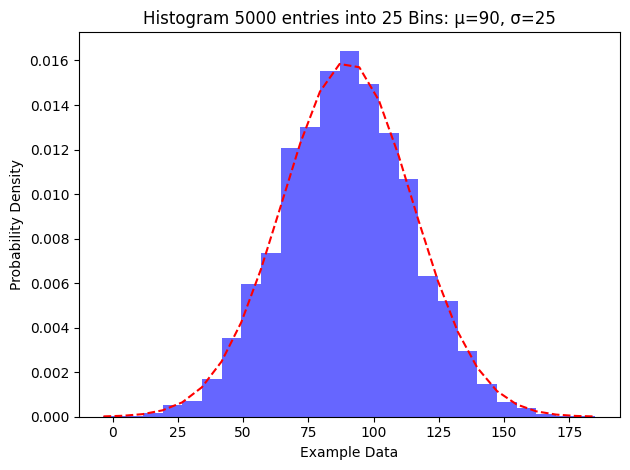

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

np.random.seed(0)
mu, sigma = 90, 25
x = mu + sigma * np.random.randn(5000)
num_bins = 25

fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=True, alpha=0.6, color='b')

y = stats.norm.pdf(bins, mu, sigma)
ax.plot(bins, y, '--', color='r')

ax.set_xlabel('Example Data')
ax.set_ylabel('Probability Density')
ax.set_title(f'Histogram {len(x)} entries into {num_bins} Bins: μ={mu}, σ={sigma}')

fig.tight_layout()

sPathFig = 'C:/VKHCG/05-DS/4000-UL/0200-DU/DU-Histogram.png'
os.makedirs(os.path.dirname(sPathFig), exist_ok=True)

fig.savefig(sPathFig)
plt.show()


In [ ]:
import pandas as pd

# Path to the uploaded file in Google Colab (adjust if uploaded in 'sample_data')
InputFileName = '/content/IP_DATA_CORE.csv'  # Change this path if uploaded in 'sample_data'
OutputFileName = 'Retrieve_Router_Location.csv'

# File path for reading the data
sFileName = f'{InputFileName}'

# Read the data from the uploaded file
IP_DATA_ALL = pd.read_csv(sFileName, usecols=['Country', 'Place Name', 'Latitude', 'Longitude'], encoding="latin-1")

# Rename column for consistency
IP_DATA_ALL.rename(columns={'Place Name': 'Place_Name'}, inplace=True)

# Filter data for London
LondonData = IP_DATA_ALL[IP_DATA_ALL['Place_Name'] == 'London']
AllData = LondonData[['Country', 'Place_Name', 'Latitude']]

# Calculate the mean and standard deviation of the Latitude
MeanData = AllData.groupby(['Country', 'Place_Name'])['Latitude'].mean()
StdData = AllData.groupby(['Country', 'Place_Name'])['Latitude'].std()

# Calculate the upper and lower bounds for outlier detection
UpperBound = float(MeanData + StdData)
OutliersHigher = AllData[AllData.Latitude > UpperBound]

LowerBound = float(MeanData - StdData)
OutliersLower = AllData[AllData.Latitude < LowerBound]

OutliersNot = AllData[(AllData.Latitude >= LowerBound) & (AllData.Latitude <= UpperBound)]

# Print results
print('All Data\n', AllData)
print('Higher than', UpperBound, '\n', OutliersHigher)
print('Lower than', LowerBound, '\n', OutliersLower)
print('Not Outliers\n', OutliersNot)


All Data
      Country Place_Name  Latitude
1910      GB     London   51.5130
1911      GB     London   51.5508
1912      GB     London   51.5649
1913      GB     London   51.5895
1914      GB     London   51.5232
...      ...        ...       ...
3434      GB     London   51.5092
3435      GB     London   51.5092
3436      GB     London   51.5163
3437      GB     London   51.5085
3438      GB     London   51.5136

[1502 rows x 3 columns]
Higher than 51.512635507867415 
      Country Place_Name  Latitude
1910      GB     London   51.5130
1911      GB     London   51.5508
1912      GB     London   51.5649
1913      GB     London   51.5895
1914      GB     London   51.5232
1916      GB     London   51.5491
1919      GB     London   51.5161
1920      GB     London   51.5198
1921      GB     London   51.5198
1923      GB     London   51.5237
1924      GB     London   51.5237
1925      GB     London   51.5237
1926      GB     London   51.5237
1927      GB     London   51.5232
3436      GB  

<ipython-input-3-2c6d61761c32>:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  UpperBound = float(MeanData + StdData)
<ipython-input-3-2c6d61761c32>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  LowerBound = float(MeanData - StdData)


In [ ]:
import os
import logging
import uuid
import shutil
import time

# Base directory (Uncomment to define the path to your base directory)
# Base = 'C:/VKHCG'

sCompanies = ['01-Vermeulen', '02-Krennwallner', '03-Hillman', '04-Clark']
sLayers = ['01-Retrieve', '02-Assess', '03-Process', '04-Transform', '05-Organise', '06-Report']
sLevels = ['debug', 'info', 'warning', 'error']

for sCompany in sCompanies:
    sFileDir = Base + '/' + sCompany

    if not os.path.exists(sFileDir):
        os.makedirs(sFileDir)

    for sLayer in sLayers:
        log = logging.getLogger()

        # Remove all old handlers
        for hdlr in log.handlers[:]:
            log.removeHandler(hdlr)

        # Path for the log directory
        sLayerDir = sFileDir + '/' + sLayer + '/Logging'

        # If the logging directory exists, remove it and recreate it
        if os.path.exists(sLayerDir):
            shutil.rmtree(sLayerDir)
            time.sleep(2)

        if not os.path.exists(sLayerDir):
            os.makedirs(sLayerDir)

        skey = str(uuid.uuid4())  # Unique identifier for the log file
        sLogFile = sLayerDir + '/Logging_' + skey + '.log'

        print('Set up logging in:', sLogFile)

        # Set up logging to file
        logging.basicConfig(level=logging.DEBUG,
                            format='%(asctime)s %(name)-12s %(levelname)-8s %(message)s',
                            datefmt='%m-%d %H:%M',
                            filename=sLogFile,
                            filemode='w')

        # Define a Handler which writes INFO messages or higher to the sys.stderr console
        console = logging.StreamHandler()
        console.setLevel(logging.INFO)

        # Set a simpler format for the console output
        formatter = logging.Formatter('%(name)-12s: %(levelname)-8s %(message)s')
        console.setFormatter(formatter)

        # Add the console handler to the root logger
        logging.getLogger('').addHandler(console)

        # Logging for each level
        for sLevel in sLevels:
            sApp = 'Application-' + sCompany + '-' + sLayer + '-' + sLevel
            logger = logging.getLogger(sApp)

            if sLevel == 'debug':
                logger.debug('Practical Data Science logged a debugging message.')
            elif sLevel == 'info':
                logger.info('Practical Data Science logged information message.')
            elif sLevel == 'warning':
                logger.warning('Practical Data Science logged a warning message.')
            elif sLevel == 'error':
                logger.error('Practical Data Science logged an error message.')


Application-01-Vermeulen-01-Retrieve-info: INFO     Practical Data Science logged information message.
Application-01-Vermeulen-01-Retrieve-warning: WARNING  Practical Data Science logged a warning message.
Application-01-Vermeulen-01-Retrieve-error: ERROR    Practical Data Science logged an error message.
Application-01-Vermeulen-02-Assess-info: INFO     Practical Data Science logged information message.
Application-01-Vermeulen-02-Assess-warning: WARNING  Practical Data Science logged a warning message.
Application-01-Vermeulen-02-Assess-error: ERROR    Practical Data Science logged an error message.
Application-01-Vermeulen-03-Process-info: INFO     Practical Data Science logged information message.
Application-01-Vermeulen-03-Process-warning: WARNING  Practical Data Science logged a warning message.
Application-01-Vermeulen-03-Process-error: ERROR    Practical Data Science logged an error message.
Application-01-Vermeulen-04-Transform-info: INFO     Practical Data Science logged in

Set up logging in: C:/VKHCG/01-Vermeulen/01-Retrieve/Logging/Logging_14eaa5a6-8c65-4da6-8d4a-8b15f5644731.log
Set up logging in: C:/VKHCG/01-Vermeulen/02-Assess/Logging/Logging_39c2b00a-bc96-4366-8eda-b946871744f3.log
Set up logging in: C:/VKHCG/01-Vermeulen/03-Process/Logging/Logging_f484f8f7-ecd8-4e66-818e-5028fb1727e0.log
Set up logging in: C:/VKHCG/01-Vermeulen/04-Transform/Logging/Logging_cf368874-dd63-4137-90ac-61236ab067ef.log
Set up logging in: C:/VKHCG/01-Vermeulen/05-Organise/Logging/Logging_62729e9d-adb8-459e-9039-03f3ca572523.log
Set up logging in: C:/VKHCG/01-Vermeulen/06-Report/Logging/Logging_081439c4-e78f-4cf9-a1e1-86b5a8ae8468.log
Set up logging in: C:/VKHCG/02-Krennwallner/01-Retrieve/Logging/Logging_848db6ba-398f-4c59-9860-2a214c24d8d1.log
Set up logging in: C:/VKHCG/02-Krennwallner/02-Assess/Logging/Logging_91b6467e-20a2-4775-9e9e-694c7fa0f05b.log
Set up logging in: C:/VKHCG/02-Krennwallner/03-Process/Logging/Logging_a7feb67c-441d-41a5-87c7-a51f0efbd1ed.log
Set up l

In [ ]:
# Retrieve Superstep
#Program to retrieve different attributes of data.
import os
import pandas as pd

# Path to the uploaded file (update this if uploaded in a different folder)
sFileName = '/content/IP_DATA_ALL.csv'  # This should be the correct path where you uploaded the CSV file
print('Loading :', sFileName)
IP_DATA_ALL = pd.read_csv(sFileName, header=0, low_memory=False, encoding="latin-1")

# Directory for saving the processed file (adjust this path as needed)
sFileDir = '/content/01-Vermeulen/01-Retrieve/01-EDS/02-Python'  # Path where you want to save the output CSV
if not os.path.exists(sFileDir):
    os.makedirs(sFileDir)

print('Rows:', IP_DATA_ALL.shape[0])
print('Columns:', IP_DATA_ALL.shape[1])

print('### Raw Data Set #####################################')
for i in range(0, len(IP_DATA_ALL.columns)):
    print(IP_DATA_ALL.columns[i], type(IP_DATA_ALL.columns[i]))

print('### Fixed Data Set ###################################')
IP_DATA_ALL_FIX = IP_DATA_ALL
for i in range(0, len(IP_DATA_ALL.columns)):
    cNameOld = IP_DATA_ALL_FIX.columns[i] + ' '
    cNameNew = cNameOld.strip().replace(" ", ".")
    IP_DATA_ALL_FIX.columns.values[i] = cNameNew
    print(IP_DATA_ALL.columns[i], type(IP_DATA_ALL.columns[i]))

print('Fixed Data Set with ID')
IP_DATA_ALL_with_ID = IP_DATA_ALL_FIX
IP_DATA_ALL_with_ID.index.names = ['RowID']

# Save the processed file (this will save it to the directory specified in sFileDir)
sFileName2 = sFileDir + '/Retrieve_IP_DATA.csv'  # Path where the processed file will be saved
IP_DATA_ALL_with_ID.to_csv(sFileName2, index=True, encoding="latin-1")

print('### Done!! ############################################')


Loading : /content/IP_DATA_ALL.csv
Rows: 107340
Columns: 9
### Raw Data Set #####################################
Unnamed: 0 <class 'str'>
ID <class 'str'>
Country <class 'str'>
Place.Name <class 'str'>
Post.Code <class 'str'>
Latitude <class 'str'>
Longitude <class 'str'>
First.IP.Number <class 'str'>
Last.IP.Number <class 'str'>
### Fixed Data Set ###################################
Unnamed:.0 <class 'str'>
ID <class 'str'>
Country <class 'str'>
Place.Name <class 'str'>
Post.Code <class 'str'>
Latitude <class 'str'>
Longitude <class 'str'>
First.IP.Number <class 'str'>
Last.IP.Number <class 'str'>
Fixed Data Set with ID
### Done!! ############################################


In [ ]:
import sys
import os
import pandas as pd
InputFileName= '/content/DE_Billboard_Locations.csv'
OutputFileName= 'Retrieve_DE_Billboard_Locations.csv'
Company='02-Krennwallner'
IP_DATA_ALL=pd.read_csv(InputFileName,header=0,low_memory=False,usecols=['Country','PlaceName','Latitude','Longitude'])
IP_DATA_ALL.rename(columns={'PlaceName':'Place_Name'},inplace=True)
ROUTERLOC=IP_DATA_ALL.drop_duplicates(subset=None,keep='first',inplace=False)
print('Rows:',ROUTERLOC.shape[0])
print('Columns:',ROUTERLOC.shape[1])
ROUTERLOC.to_csv(OutputFileName,index=False)
print("##################Done!!!#######################")

Rows: 8873
Columns: 4
##################Done!!!#######################


In [ ]:
import os
import sys
import pandas as pd
IncoTerm='EXW'
InputFileName='/content/Incoterm_2010.csv'
OutputFileName='Retrieve_Incoterm_'+IncoTerm+'_RuleSet.csv'
Company='03-Hillman'
IncotermGrid=pd.read_csv(InputFileName,header=0,low_memory=False)
IncotermRule=IncotermGrid[IncotermGrid.Shipping_Term==IncoTerm]
print('Rows:',IncotermRule.shape[0])
print('Columns:',IncotermRule.shape[1])
print(IncotermRule)
IncotermRule.to_csv(OutputFileName,index=False)
print('##### Done!!!! ######')

Rows: 1
Columns: 9
  Shipping_Term  Seller Carrier Port_From   Ship Port_To Terminal Named_Place  \
0           EXW  Seller   Buyer     Buyer  Buyer   Buyer    Buyer       Buyer   

   Buyer  
0  Buyer  
##### Done!!!! ######


In [ ]:
import os
import pandas as pd
from geopy.distance import geodesic

InputFileName = '/content/GB_Postcode_Warehouse.csv'
OutputFileName = 'Retrieve_GB_Warehouse.csv'
Company = '03-Hillman'

# Load and clean warehouse data
Warehouse = pd.read_csv(InputFileName, header=0, low_memory=False)
WarehouseClean = Warehouse[Warehouse['latitude'] != 0]
WarehouseGood = WarehouseClean[WarehouseClean['longitude'] != 0]
WarehouseGood.drop_duplicates(subset='postcode', keep='first', inplace=True)
WarehouseGood.sort_values(by='postcode', ascending=True, inplace=True)

# Save cleaned data
WarehouseGood.to_csv(OutputFileName, index=False)

# Loop through first 20 records for route generation
WarehouseLoop = WarehouseGood.head(20)
for i in range(WarehouseLoop.shape[0]):
    print('Run:', i, '→', WarehouseLoop['postcode'].iloc[i])

    # Generate routes
    WarehouseHold = WarehouseGood.head(10000).copy()
    WarehouseHold['Transaction'] = 'WH-to-WH'
    OutputLoopName = 'Retrieve_Route_' + 'WH-' + WarehouseLoop['postcode'].iloc[i] + '_Route.csv'

    WarehouseHold['Seller'] = 'WH-' + WarehouseLoop['postcode'].iloc[i]
    WarehouseHold['Seller_Latitude'] = WarehouseLoop['latitude'].iloc[i]
    WarehouseHold['Seller_Longitude'] = WarehouseLoop['longitude'].iloc[i]
    WarehouseHold['Buyer'] = 'WH-' + WarehouseHold['postcode']
    WarehouseHold['Buyer_Latitude'] = WarehouseHold['latitude']
    WarehouseHold['Buyer_Longitude'] = WarehouseHold['longitude']

    # Calculate distance between seller and buyer
    WarehouseHold['Distance'] = WarehouseHold.apply(
        lambda row: geodesic(
            (WarehouseHold['Seller_Latitude'].iloc[i], WarehouseHold['Seller_Longitude'].iloc[i]),
            (row['Buyer_Latitude'], row['Buyer_Longitude'])
        ).miles,
        axis=1
    )

    # Drop unused columns
    WarehouseHold.drop(['id', 'postcode', 'latitude', 'longitude'], axis=1, inplace=True)

    # Save route data
    WarehouseHold.to_csv(OutputLoopName, index=False)

print('Done!')

Run: 0 → AB10
Run: 1 → AB11
Run: 2 → AB12
Run: 3 → AB13
Run: 4 → AB14
Run: 5 → AB15
Run: 6 → AB16
Run: 7 → AB21
Run: 8 → AB22
Run: 9 → AB23
Run: 10 → AB24
Run: 11 → AB25
Run: 12 → AB30
Run: 13 → AB31
Run: 14 → AB32
Run: 15 → AB33
Run: 16 → AB34
Run: 17 → AB35
Run: 18 → AB36
Run: 19 → AB37
Done!


In [ ]:
import pandas as pd

# Define your input and output file names and directory
sFileDir = '/content'  # Ensure this is the correct directory
sInputFileName = '/content/Good-or-Bad.csv'
sOutputFileName = 'Good-or-Bad-02.csv'
sFileName = os.path.join(sFileDir, sInputFileName)

# Load the raw data
RawData = pd.read_csv(sFileName, header=0)
print('##Raw Data Values')
print(RawData)
print('Data Profile')
print('Rows:', RawData.shape[0])
print('Columns:', RawData.shape[1])

# Drop any columns with missing values
TestData = RawData.dropna(axis=1, how='any')
print('Test Data Values')
print(TestData)
print('Data Profile')
print('Rows:', TestData.shape[0])
print('Columns:', TestData.shape[1])

# Save the cleaned data
sFileName = os.path.join(sFileDir, sOutputFileName)
TestData.to_csv(sFileName, index=False)
print('done')

##Raw Data Values
      ID FieldA  FieldB FieldC  FieldD  FieldE    FieldF  FieldG
0    1.0   Good  Better   Best  1024.0     NaN   10241.0       1
1    2.0   Good     NaN   Best   512.0     NaN    5121.0       2
2    3.0   Good  Better    NaN   256.0     NaN     256.0       3
3    4.0   Good  Better   Best     NaN     NaN     211.0       4
4    5.0   Good  Better    NaN    64.0     NaN    6411.0       5
5    6.0   Good     NaN   Best    32.0     NaN      32.0       6
6    7.0    NaN  Better   Best    16.0     NaN    1611.0       7
7    8.0    NaN     NaN   Best     8.0     NaN    8111.0       8
8    9.0    NaN     NaN    NaN     4.0     NaN      41.0       9
9   10.0      A      B       C     2.0     NaN   21111.0      10
10   NaN    NaN     NaN    NaN     NaN     NaN       NaN      11
11  10.0   Good  Better   Best  1024.0     NaN  102411.0      12
12  10.0   Good     NaN   Best   512.0     NaN     512.0      13
13  10.0   Good  Better    NaN   256.0     NaN    1256.0      14
14  10.

In [ ]:
# -- coding: utf-8 --
# ########## Assess-Good-Bad-03.py ##########
import sys
import os
import pandas as pd

sInputFileName = '/content/Good-or-Bad-03.csv'
sOutputFileName = 'Good-or-Bad-03.csv'

# ########## Import Warehouse ##########
sFileName =  sInputFileName
print('Loading :', sFileName)
RawData = pd.read_csv(sFileName, header=0)

print('########################################')
print('# Raw Data Values')
print('########################################')
print(RawData)
print('########################################')
print('# Data Profile')
print('########################################')
print('Rows :', RawData.shape[0])
print('Columns :', RawData.shape[1])
print('########################################')

sFileName = sInputFileName
RawData.to_csv(sFileName, index=False)

# ########## Clean Data ##########
TestData = RawData.dropna(thresh=2)

print('########################################')
print('# Test Data Values')
print('########################################')
print(TestData)
print('########################################')
print('# Data Profile')
print('########################################')
print('Rows :', TestData.shape[0])
print('Columns :', TestData.shape[1])
print('########################################')

sFileName = sOutputFileName
TestData.to_csv(sFileName, index=False)

print('########################################')
print('# Done!!')
print('########################################')

Loading : /content/Good-or-Bad-03.csv
########################################
# Raw Data Values
########################################
      ID FieldA  FieldB FieldC  FieldD  FieldE    FieldF  FieldG
0    1.0   Good  Better   Best  1024.0     NaN   10241.0       1
1    2.0   Good     NaN   Best   512.0     NaN    5121.0       2
2    3.0   Good  Better    NaN   256.0     NaN     256.0       3
3    4.0   Good  Better   Best     NaN     NaN     211.0       4
4    5.0   Good  Better    NaN    64.0     NaN    6411.0       5
5    6.0   Good     NaN   Best    32.0     NaN      32.0       6
6    7.0    NaN  Better   Best    16.0     NaN    1611.0       7
7    8.0    NaN     NaN   Best     8.0     NaN    8111.0       8
8    9.0    NaN     NaN    NaN     4.0     NaN      41.0       9
9   10.0      A      B       C     2.0     NaN   21111.0      10
10  10.0   Good  Better   Best  1024.0     NaN  102411.0      12
11  10.0   Good     NaN   Best   512.0     NaN     512.0      13
12  10.0   Good  

In [ ]:
import sys
import os
import pandas as pd

# Input file names
sInputFileName1 = '/content/Retrieve_Country_Code.csv'
sInputFileName2 = '/content/Retrieve_IP_DATA.csv'
sInputFileName3 = '/content/Retrieve_All_Router_Location.csv'

# Output file name
sOutputFileName = 'Assess-Network-Routing-Company.csv'


# Import Country Data
sFileName =  sInputFileName1
print("Loading :", sFileName)
CountryData = pd.read_csv(sFileName, header=0, low_memory=False, encoding='latin-1')
print("Loaded Country:", CountryData.columns.values)

# Assess Country Data
print("Changed:", CountryData.columns.values)
CountryData.rename(columns={'Country': 'Country_Name'}, inplace=True)
CountryData.rename(columns={'ISO-2-CODE': 'Country_Code'}, inplace=True)
CountryData.drop(['ISO-M49', 'ISO-3-Code', 'RowID'], axis=1, inplace=True)
print("To:", CountryData.columns.values)

# Import Company Data
sFileName =  sInputFileName2
print("Loading :", sFileName)
CompanyData = pd.read_csv(sFileName, header=0, low_memory=False, encoding='latin-1')
print("Loaded Company:", CompanyData.columns.values)

# Assess Company Data
CompanyData.rename(columns={'Country': 'Country_Code'}, inplace=True)
print("To:", CompanyData.columns.values)

# Import Customer Data
sFileName =  sInputFileName3
print("Loading :", sFileName)
CustomerRawData = pd.read_csv(sFileName, header=0, low_memory=False, encoding='latin-1')
print("Loaded Customer:", CustomerRawData.columns.values)

# Clean Customer Data
CustomerData = CustomerRawData.dropna(axis=0, how='any')
CustomerData.rename(columns={'Country': 'Country_Code'}, inplace=True)
print("To:", CustomerData.columns.values)

# Merge Company and Country Data
print("Merge Company and Country Data")
CompanyNetworkData = pd.merge(
    CompanyData,
    CountryData,
    how='inner',
    on='Country_Code'
)

# Rename columns dynamically
for i in CompanyNetworkData.columns.values:
    j = 'Company_' + i
    CompanyNetworkData.rename(columns={i: j}, inplace=True)
print("To:", CompanyNetworkData.columns.values)


sFileName =  sOutputFileName
print("Storing :", sFileName)
CompanyNetworkData.to_csv(sFileName, index=False, encoding='latin-1')

print("### Done! ###")

Loading : /content/Retrieve_Country_Code.csv
Loaded Country: ['RowID' 'Country' 'ISO-2-CODE' 'ISO-3-Code' 'ISO-M49']
Changed: ['RowID' 'Country' 'ISO-2-CODE' 'ISO-3-Code' 'ISO-M49']
To: ['Country_Name' 'Country_Code']
Loading : /content/Retrieve_IP_DATA.csv
Loaded Company: ['RowID' 'Country' 'Place.Name' 'Post.Code' 'Latitude' 'Longitude']
To: ['RowID' 'Country_Code' 'Place.Name' 'Post.Code' 'Latitude' 'Longitude']
Loading : /content/Retrieve_All_Router_Location.csv
Loaded Customer: ['Country' 'Place_Name' 'Latitude' 'Longitude']
To: ['Country_Code' 'Place_Name' 'Latitude' 'Longitude']
Merge Company and Country Data
To: ['Company_RowID' 'Company_Country_Code' 'Company_Place.Name'
 'Company_Post.Code' 'Company_Latitude' 'Company_Longitude'
 'Company_Country_Name']
Storing : Assess-Network-Routing-Company.csv


<ipython-input-36-5e33e3eab902>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerData.rename(columns={'Country': 'Country_Code'}, inplace=True)


### Done! ###


In [ ]:
import sys
import os
import pandas as pd
Company='03-Hillman'
InputFileName='/content/sample_data/Retrieve_All_Countries.txt'
OutputFileName='/content/sample_data/Assess_All_Warehouse.csv'
Warehouse=pd.read_csv(InputFileName,header=0,low_memory=False,encoding="latin-1")
sColumns={'X1':'Country',
          'X2':'PostCode',
          'X3':'PlaceName',
          'X4':'AreaName',
          'X5':'AreaCode',
          'X10':'Latitude',
          'X11':'Longitude'}
Warehouse.rename(columns=sColumns,inplace=True)
WarehouseGood=Warehouse
WarehouseGood.to_csv(OutputFileName,index=False)
print('#################### DONE!!! ##########################')

In [ ]:
import sys
import os
from datetime import datetime
from datetime import timedelta
from pytz import timezone, all_timezones
import pandas as pd
import sqlite3 as sq
from pandas.io import sql
import uuid

InputFileName='/content/VehicleData.csv'

#sDataBaseDir = '/03-Process/SQLite'
#if not os.path.exists(sDataBaseDir):
#    os.makedirs(sDataBaseDir)

sDatabaseName='/Hillman.db'
conn1 = sq.connect(sDatabaseName)

#sDataVaultDir= '/88-DV'
#if not os.path.exists(sDataVaultDir):
#    os.makedirs(sDataVaultDir)

sDatabaseName = '/content/datavault.db'
conn2 = sq.connect(sDatabaseName)

base = datetime(2018,1,1,0,0,0)
numUnits=10*365*24

date_list = [base - timedelta(hours=x) for x in range(0, numUnits)]
t=0
TimeFrame = pd.DataFrame()  # Initialize an empty DataFrame
for i in date_list:
    now_utc = i.replace(tzinfo=timezone('UTC'))
    sDateTime = now_utc.strftime("%Y-%m-%d %H:%M:%S")
    print(sDateTime)
    sDateTimeKey = sDateTime.replace(' ','-').replace(':','-')
    t += 1
    IDNumber = str(uuid.uuid4())
    TimeLine = {
        'ZoneBaseKey': ['UTC'],
        'IDNumber': [IDNumber],
        'nDateTimeValue': [now_utc],
        'DateTimeValue': [sDateTime],
        'DateTimeKey': [sDateTimeKey]
    }

    TimeRow = pd.DataFrame(TimeLine)
    TimeFrame = pd.concat([TimeFrame, TimeRow], ignore_index=True)  # Concatenate instead of append


TimeHub = TimeFrame[['IDNumber', 'ZoneBaseKey', 'DateTimeKey', 'DateTimeValue']]
TimeHubIndex = TimeHub.set_index(['IDNumber'], inplace=False)

TimeFrame.set_index(['IDNumber'], inplace=True)

sTable = 'Process-Time'
print('Storing :', sDatabaseName, ' Table:', sTable)
TimeHubIndex.to_sql(sTable, conn1, if_exists="replace")

sTable = 'Hub-Time'
print('Storing :', sDatabaseName, ' Table:', sTable)
TimeHubIndex.to_sql(sTable, conn2, if_exists="replace")

active_timezones = all_timezones
z = 0
for zone in active_timezones:
    t = 0
    TimeZoneFrame = pd.DataFrame()  # Initialize an empty DataFrame
    for j in range(TimeFrame.shape[0]):
        now_date = TimeFrame['nDateTimeValue'][j]
        DateTimeKey = TimeFrame['DateTimeKey'][j]
        now_utc = now_date.replace(tzinfo=timezone('UTC'))
        sDateTime = now_utc.strftime("%Y-%m-%d %H:%M:%S")
        now_zone = now_utc.astimezone(timezone(zone))
        sZoneDateTime = now_zone.strftime("%Y-%m-%d %H:%M:%S")
        print(sZoneDateTime)
        t += 1
        z += 1
        IDZoneNumber = str(uuid.uuid4())
        TimeZoneLine = {
            'ZoneBaseKey': ['UTC'],
            'IDZoneNumber': [IDZoneNumber],
            'DateTimeKey': [DateTimeKey],
            'UTCDateTimeValue': [sDateTime],
            'Zone': [zone],
            'DateTimeValue': [sZoneDateTime]
        }

        TimeZoneRow = pd.DataFrame(TimeZoneLine)
        TimeZoneFrame = pd.concat([TimeZoneFrame, TimeZoneRow], ignore_index=True)  # Concatenate instead of append

    TimeZoneFrameIndex = TimeZoneFrame.set_index(['IDZoneNumber'], inplace=False)
    sZone = zone.replace('/', '-').replace(' ', '')

    sTable = 'Process-Time-' + sZone
    print('Storing :', sDatabaseName, ' Table:', sTable)
    TimeZoneFrameIndex.to_sql(sTable, conn1, if_exists="replace")


    sTable = 'Satellite-Time-' + sZone
    print('Storing :', sDatabaseName, ' Table:', sTable)
    TimeZoneFrameIndex.to_sql(sTable, conn2, if_exists="replace")


print('Vacuum Databases')
sSQL = "VACUUM;"
sql.execute(sSQL, conn1)
sql.execute(sSQL, conn2)


print('Done!')

Streaming output truncated to the last 5000 lines.
2015-03-13 12:00:00
2015-03-13 11:00:00
2015-03-13 10:00:00
2015-03-13 09:00:00
2015-03-13 08:00:00
2015-03-13 07:00:00
2015-03-13 06:00:00
2015-03-13 05:00:00
2015-03-13 04:00:00
2015-03-13 03:00:00
2015-03-13 02:00:00
2015-03-13 01:00:00
2015-03-13 00:00:00
2015-03-12 23:00:00
2015-03-12 22:00:00
2015-03-12 21:00:00
2015-03-12 20:00:00
2015-03-12 19:00:00
2015-03-12 18:00:00
2015-03-12 17:00:00
2015-03-12 16:00:00
2015-03-12 15:00:00
2015-03-12 14:00:00
2015-03-12 13:00:00
2015-03-12 12:00:00
2015-03-12 11:00:00
2015-03-12 10:00:00
2015-03-12 09:00:00
2015-03-12 08:00:00
2015-03-12 07:00:00
2015-03-12 06:00:00
2015-03-12 05:00:00
2015-03-12 04:00:00
2015-03-12 03:00:00
2015-03-12 02:00:00
2015-03-12 01:00:00
2015-03-12 00:00:00
2015-03-11 23:00:00
2015-03-11 22:00:00
2015-03-11 21:00:00
2015-03-11 20:00:00
2015-03-11 19:00:00
2015-03-11 18:00:00
2015-03-11 17:00:00
2015-03-11 16:00:00
2015-03-11 15:00:00
2015-03-11 14:00:00
2015-03-1

KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-warehouse-geocoder")
InputFileName='/content/GB_Postcode_Warehouse.csv'
OutputFileName='Assess_GB_Postcode_Warehouse.csv'
Company='03-Hillman'
Warehouse=pd.read_csv(InputFileName,header=0,low_memory=False)
Warehouse.sort_values(by='postcode',ascending=1)
WarehouseGoodHead=Warehouse[Warehouse.latitude !=0].head(5)
WarehouseGoodTail=Warehouse[Warehouse.latitude !=0].tail(5)
WarehouseGoodHead['Warehouse_Point']=WarehouseGoodHead.apply(lambda row:(str(row['latitude'])+','+str(row['longitude'])),axis=1)
WarehouseGoodHead['Warehouse_Address']=WarehouseGoodHead.apply(lambda row:geolocator.reverse(row['Warehouse_Point']).address,axis=1)
WarehouseGoodHead.drop('Warehouse_Point', axis=1, inplace=True)
WarehouseGoodHead.drop('id', axis=1, inplace=True)
WarehouseGoodHead.drop('postcode', axis=1, inplace=True)

WarehouseGoodTail['Warehouse_Point']=WarehouseGoodTail.apply(lambda row:(str(row['latitude'])+','+str(row['longitude'])),axis=1)
WarehouseGoodTail['Warehouse_Address']=WarehouseGoodTail.apply(lambda row:geolocator.reverse(row['Warehouse_Point']).address,axis=1)

WarehouseGoodTail.drop('Warehouse_Point', axis=1, inplace=True)
WarehouseGoodTail.drop('id', axis=1, inplace=True)
WarehouseGoodTail.drop('postcode', axis=1, inplace=True)

WarehouseGood = pd.concat([WarehouseGoodHead, WarehouseGoodTail], ignore_index=True)
print(WarehouseGood)
WarehouseGood.to_csv(OutputFileName,index=False)
print('################ !DONE ##################')

urllib3.connectionpool: WARNING  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")': /reverse?lat=57.10801&lon=-2.23776&format=json&addressdetails=1
urllib3.connectionpool: WARNING  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")': /reverse?lat=57.10076&lon=-2.27073&format=json&addressdetails=1
urllib3.connectionpool: WARNING  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")': /reverse?lat=53.837717&lon=-1.780013&format=json&addressdetails=1
urllib3.connectionpo

    latitude  longitude                                  Warehouse_Address
0  57.135140  -2.117310  35, Broomhill Road, Broomhill, Ashley and Broo...
1  57.138750  -2.090890  South Esplanade West, Tullos, Torry, Aberdeen ...
2  57.101000  -2.110600  A92, Charlestown, Nigg, Aberdeen City, Alba / ...
3  57.108010  -2.237760  Colthill Circle, Cults, Bieldside and Milltimb...
4  57.100760  -2.270730  Johnston Gardens East, Culter, Peterculter, Ab...
5  53.837717  -1.780013  HM Revenue and Customs, Riverside Estate, Ship...
6  53.794470  -1.766539  Listerhills Road, Great Horton, Bradford, West...
7  51.518556  -0.714794  Howarth Road, Stafferton Way Industrial Area, ...
8  54.890923  -2.943847  Carlisle Delivery Office, Junction Street, Den...
9  57.481338  -4.223951  Railway Terrace, Longman, Crown and City Centr...
################ !DONE ##################


In [ ]:
import sys
import os
import pandas as pd

InputFileName = '/content/Retrieve_All_Countries.csv'
#EDSDir = '02-Assess/01-EDS'
#OutputDir = EDSDir + '/02-Python'
OutputFileName = 'Assess_All_Warehouse.csv'

# Define the directory where the file will be saved
# Since sFileDir is not defined, let's use the current directory or set it explicitly
sFileDir = '/content'  # Update this if you want a specific directory
print('###########')
print('Loading:', sFileName)

# Read the input file with the correct encoding
Warehouse = pd.read_csv(sFileName, header=0, low_memory=False, encoding="latin-1")

# Rename the columns
sColumns = {
    'X1': 'Country',
    'X2': 'PostCode',
    'X3': 'PlaceName',
    'X4': 'AreaName',
    'X5': 'AreaCode',
    'X10': 'Latitude',
    'X11': 'Longitude'
}

Warehouse.rename(columns=sColumns, inplace=True)

# Assign the modified DataFrame to WarehouseGood
WarehouseGood = Warehouse

# Save the cleaned DataFrame to CSV
sFileName = os.path.join(sFileDir, OutputFileName)
WarehouseGood.to_csv(sFileName, index=False)

print('### Done!! ############################################')

###########
Loading: Assess-Network-Routing-Company.csv
### Done!! ############################################


In [ ]:
import sys
import os
import sqlite3 as sq
import yfinance as yf  # Using yfinance instead of Quandl
import pandas as pd

# Define file directories
sFileDir1 = '/content'  # Replace with your desired directory path
sFileDir2 = '/content'  # Same here, since you mentioned using only one directory
sFileDir3 = '/content'  # Same as above

# Database and CSV filenames
sInputFileName = '/content/VKHCG_Shares.csv'
sOutputFileName = 'Shares.csv'

# Ensure paths for the database and CSV files
sDataBaseDir = '/content/database'  # Make sure this exists or create it
os.makedirs(sDataBaseDir, exist_ok=True)

# Define the SQLite database path
sDatabaseName = os.path.join(sDataBaseDir, 'clark.db')
conn = sq.connect(sDatabaseName)

### Import Share Names Data
print('################################')
print('Loading :', sInputFileName)
print('################################')
RawData = pd.read_csv(sInputFileName, header=0, low_memory=False, encoding="latin-1")
RawData.drop_duplicates(subset=None, keep='first', inplace=True)
print('Rows :', RawData.shape[0])
print('Columns:', RawData.shape[1])
print('################')

# Ensure directories exist and create them if not
os.makedirs(sFileDir1, exist_ok=True)

# Storing RawData
sFileName = sFileDir1 + '/Retrieve_' + sOutputFileName
RawData.to_csv(sFileName, index=False)
print(f'Stored: {sFileName}')

sFileName = sFileDir2 + '/Assess_' + sOutputFileName
RawData.to_csv(sFileName, index=False)
print(f'Stored: {sFileName}')

sFileName = sFileDir3 + '/Process_' + sOutputFileName
RawData.to_csv(sFileName, index=False)
print(f'Stored: {sFileName}')

### Import Shares Data Details
nShares = RawData.shape[0]

for sShare in range(nShares):
    sShareName = str(RawData['Shares'][sShare])

    # Handle invalid tickers by stripping prefixes like 'WIKI/' or 'FRED/'
    if sShareName.startswith("WIKI/"):
        sShareName = sShareName.split("/")[1]  # Get the symbol part (e.g., 'GOOGL')
    elif sShareName.startswith("FRED/"):
        sShareName = sShareName.split("/")[1]  # Get the symbol part (e.g., 'GDP')

    try:
        # Fetch data using yfinance
        ShareData = yf.download(sShareName, period="1y")  # You can adjust the period as needed
        if ShareData.empty:
            print(f"No data found for {sShareName}. Skipping...")
            continue
    except Exception as e:
        print(f"Error retrieving data for {sShareName}: {e}")
        continue

    UnitsOwn = RawData['Units'][sShare]
    ShareData['UnitsOwn'] = UnitsOwn
    ShareData['ShareCode'] = sShareName
    print('################')
    print('Share :', sShareName)
    print('Rows :', ShareData.shape[0])
    print('Columns:', ShareData.shape[1])
    print('################')

    # Store to SQLite
    sTable = str(RawData['sTable'][sShare])
    print('Storing :', sDatabaseName, 'Table:', sTable)
    ShareData.to_sql(sTable, conn, if_exists="replace")
    print('################')

    # Save the processed data to CSV in all directories
    sOutputFileName = sTable.replace("/", "-") + '.csv'

    # Store in Retrieve, Assess, and Process folders
    sFileName = sFileDir1 + '/Retrieve_' + sOutputFileName
    ShareData.to_csv(sFileName, index=False)
    print(f'Stored: {sFileName}')

    sFileName = sFileDir2 + '/Assess_' + sOutputFileName
    ShareData.to_csv(sFileName, index=False)
    print(f'Stored: {sFileName}')

    sFileName = sFileDir3 + '/Process_' + sOutputFileName
    ShareData.to_csv(sFileName, index=False)
    print(f'Stored: {sFileName}')

print('### Done!! ############################################')

################################
Loading : /content/VKHCG_Shares.csv
################################
Rows : 10
Columns: 3
################
Stored: /content/Retrieve_Shares.csv
Stored: /content/Assess_Shares.csv
Stored: /content/Process_Shares.csv
################
Share : GOOGL
Rows : 251
Columns: 7
################
Storing : /content/database/clark.db Table: WIKI_Google
################
Stored: /content/Retrieve_WIKI_Google.csv
Stored: /content/Assess_WIKI_Google.csv
Stored: /content/Process_WIKI_Google.csv
################
Share : MSFT
Rows : 251
Columns: 7
################
Storing : /content/database/clark.db Table: WIKI_Microsoft
################
Stored: /content/Retrieve_WIKI_Microsoft.csv
Stored: /content/Assess_WIKI_Microsoft.csv
Stored: /content/Process_WIKI_Microsoft.csv
################
Share : UPS
Rows : 251
Columns: 7
################
Storing : /content/database/clark.db Table: WIKI_UPS
################
Stored: /content/Retrieve_WIKI_UPS.csv
Stored: /content/Assess_WIKI_UPS

yfinance    : ERROR    Failed to get ticker 'LOCALBTC/USD' reason: Expecting value: line 1 column 1 (char 0)
yfinance    : ERROR    
1 Failed download:
yfinance    : ERROR    ['LOCALBTC/USD']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


No data found for LOCALBTC/USD. Skipping...


yfinance    : ERROR    Failed to get ticker 'PERTH/AUD_USD_M' reason: Expecting value: line 1 column 1 (char 0)
yfinance    : ERROR    
1 Failed download:
yfinance    : ERROR    ['PERTH/AUD_USD_M']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


No data found for PERTH/AUD_USD_M. Skipping...


yfinance    : ERROR    Failed to get ticker 'PERTH/AUD_USD_D' reason: Expecting value: line 1 column 1 (char 0)
yfinance    : ERROR    
1 Failed download:
yfinance    : ERROR    ['PERTH/AUD_USD_D']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


No data found for PERTH/AUD_USD_D. Skipping...


yfinance    : ERROR    
1 Failed download:
yfinance    : ERROR    ['GDP']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for GDP. Skipping...


yfinance    : ERROR    Failed to get ticker 'FED/RXI_US_N_A_UK' reason: Expecting value: line 1 column 1 (char 0)
yfinance    : ERROR    
1 Failed download:
yfinance    : ERROR    ['FED/RXI_US_N_A_UK']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


No data found for FED/RXI_US_N_A_UK. Skipping...


yfinance    : ERROR    Failed to get ticker 'FED/RXI_N_A_CA' reason: Expecting value: line 1 column 1 (char 0)
yfinance    : ERROR    
1 Failed download:
yfinance    : ERROR    ['FED/RXI_N_A_CA']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


No data found for FED/RXI_N_A_CA. Skipping...
### Done!! ############################################
